In [1]:
import pandas as pd
import os
import glob
import numpy as np

In [2]:
dir_path = 'adj_condition'
all_files = glob.glob(os.path.join(dir_path, "*.csv"))

dfs = []

for file in all_files:
    try:
        df_temp = pd.read_csv(file)
        df_temp['source_file'] = os.path.basename(file)
        dfs.append(df_temp)
        print(f"Loaded {file}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Concatenate all dataframes
if dfs:
    df = pd.concat(dfs, ignore_index=True)
    print(f"Combined DataFrame has {df.shape[0]} rows and {df.shape[1]} columns")
else:
    print("No CSV files were loaded.")
    df = pd.DataFrame()

Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_condition/adj_condition_10.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_condition/adj_condition_11.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_condition/adj_condition_13.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_condition/adj_condition_12.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_condition/adj_condition_16.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_condition/adj_condition_17.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_condition/adj_condition_15.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_condition/adj_condition_14.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_condition/adj_condition_7.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_condition/adj_condition_6.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_condition/adj_condition_4.csv
Loaded /Users

In [3]:
df

,timestamp,date,activity,source_file
0,2004-08-31 09:00:00,2004-08-31,91,adj_condition_10.csv
1,2004-08-31 09:01:00,2004-08-31,0,adj_condition_10.csv
2,2004-08-31 09:02:00,2004-08-31,0,adj_condition_10.csv
3,2004-08-31 09:03:00,2004-08-31,0,adj_condition_10.csv
4,2004-08-31 09:04:00,2004-08-31,0,adj_condition_10.csv
...,...,...,...,...
403296,2002-06-25 23:55:00,2002-06-25,0,adj_condition_21.csv
403297,2002-06-25 23:56:00,2002-06-25,0,adj_condition_21.csv
403298,2002-06-25 23:57:00,2002-06-25,0,adj_condition_21.csv
403299,2002-06-25 23:58:00,2002-06-25,0,adj_condition_21.csv


In [4]:
df['patient_id'] = df['source_file'].str.extract(r'adj_condition_(\d+)').astype(int)

df['patient_type'] = 'condition'

df.head()

,timestamp,date,activity,source_file,patient_id,patient_type
0,2004-08-31 09:00:00,2004-08-31,91,adj_condition_10.csv,10,condition
1,2004-08-31 09:01:00,2004-08-31,0,adj_condition_10.csv,10,condition
2,2004-08-31 09:02:00,2004-08-31,0,adj_condition_10.csv,10,condition
3,2004-08-31 09:03:00,2004-08-31,0,adj_condition_10.csv,10,condition
4,2004-08-31 09:04:00,2004-08-31,0,adj_condition_10.csv,10,condition


In [5]:
control_dir_path = 'adj_control'
control_files = glob.glob(os.path.join(control_dir_path, "*.csv"))

control_dfs = []

for file in control_files:
    try:
        df_temp = pd.read_csv(file)
        df_temp['source_file'] = os.path.basename(file)
        df_temp['patient_id'] = df_temp['source_file'].str.extract(r'adj_control_(\d+)').astype(int)
        df_temp['patient_type'] = 'control'
        control_dfs.append(df_temp)
        print(f"Loaded {file}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

if control_dfs:
    df_control = pd.concat(control_dfs, ignore_index=True)
    df = pd.concat([df, df_control], ignore_index=True)
    print(f"Combined DataFrame now has {df.shape[0]} rows and {df.shape[1]} columns")
else:
    print("No control CSV files were loaded.")

Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_control/adj_control_24.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_control/adj_control_30.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_control/adj_control_18.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_control/adj_control_19.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_control/adj_control_31.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_control/adj_control_25.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_control/adj_control_27.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_control/adj_control_26.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_control/adj_control_32.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_control/adj_control_22.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/adj_control/adj_control_9.csv
Loaded /Users/cris/Desktop/4 - RESEARCH/depresjon/data/

In [6]:
df

,timestamp,date,activity,source_file,patient_id,patient_type
0,2004-08-31 09:00:00,2004-08-31,91,adj_condition_10.csv,10,condition
1,2004-08-31 09:01:00,2004-08-31,0,adj_condition_10.csv,10,condition
2,2004-08-31 09:02:00,2004-08-31,0,adj_condition_10.csv,10,condition
3,2004-08-31 09:03:00,2004-08-31,0,adj_condition_10.csv,10,condition
4,2004-08-31 09:04:00,2004-08-31,0,adj_condition_10.csv,10,condition
...,...,...,...,...,...,...
961136,2006-01-18 23:55:00,2006-01-18,0,adj_control_29.csv,29,control
961137,2006-01-18 23:56:00,2006-01-18,0,adj_control_29.csv,29,control
961138,2006-01-18 23:57:00,2006-01-18,0,adj_control_29.csv,29,control
961139,2006-01-18 23:58:00,2006-01-18,0,adj_control_29.csv,29,control


In [7]:
df = df.drop(['source_file'], axis=1)

df['patient_type'] = df['patient_type'].map({'condition': 0, 'control': 1})

df.head()

,timestamp,date,activity,patient_id,patient_type
0,2004-08-31 09:00:00,2004-08-31,91,10,0
1,2004-08-31 09:01:00,2004-08-31,0,10,0
2,2004-08-31 09:02:00,2004-08-31,0,10,0
3,2004-08-31 09:03:00,2004-08-31,0,10,0
4,2004-08-31 09:04:00,2004-08-31,0,10,0


In [8]:
print(df.shape)
print(df.info())

(961141, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961141 entries, 0 to 961140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   timestamp     961141 non-null  object
 1   date          961141 non-null  object
 2   activity      961141 non-null  int64 
 3   patient_id    961141 non-null  int64 
 4   patient_type  961141 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 36.7+ MB
None


In [9]:
df['date'] = pd.to_datetime(df['date'])
daily_activity = df.groupby(['patient_id', 'patient_type', 'date'])['activity'].sum().reset_index()

daily_activity = daily_activity.rename(columns={'activity': 'daily_activity'})
daily_activity['patient_group'] = daily_activity['patient_type'].map({0: 'Condition', 1: 'Control'})

daily_activity = daily_activity.sort_values(['patient_id', 'date'])
daily_activity.head()

,patient_id,patient_type,date,daily_activity,patient_group
11,1,1,2003-03-18,209876,Control
12,1,1,2003-03-19,267218,Control
13,1,1,2003-03-20,325413,Control
14,1,1,2003-03-21,244315,Control
15,1,1,2003-03-22,264515,Control


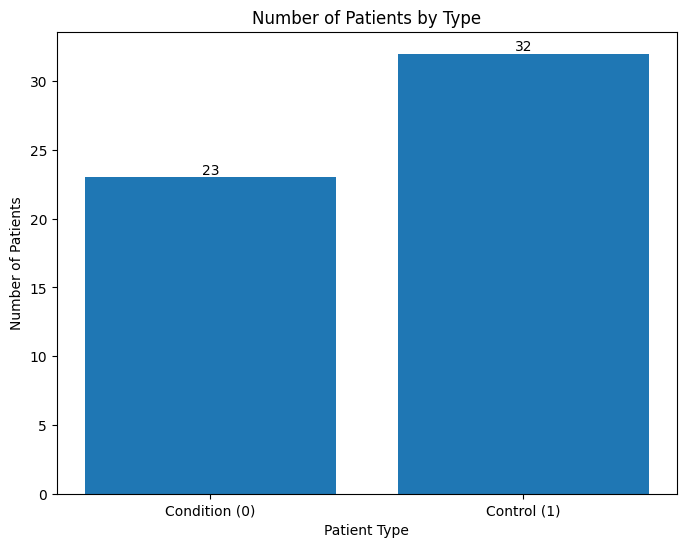


Number of patients by type:


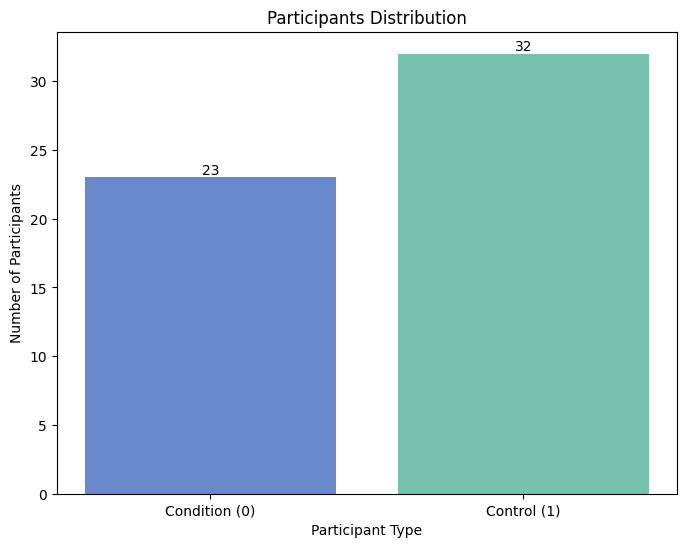

patient_type
0    23
1    32
Name: patient_id, dtype: int64


In [10]:
import matplotlib.pyplot as plt

# Count unique patient IDs for each patient type
patient_counts = df.groupby('patient_type')['patient_id'].nunique()

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(patient_counts.index, patient_counts.values)

# Customize the plot
plt.title('Number of Patients by Type')
plt.xlabel('Patient Type')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Condition (0)', 'Control (1)'])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.show()

# Print the actual counts
print("\nNumber of patients by type:")
plt.figure(figsize=(8, 6))
bars = plt.bar(patient_counts.index, patient_counts.values, color=['#6a89cc', '#78c2ad'])

# Customize the plot
plt.title('Participants Distribution')
plt.xlabel('Participant Type')
plt.ylabel('Number of Participants')
plt.xticks([0, 1], ['Condition (0)', 'Control (1)'])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.show()
print(patient_counts)


In [11]:
daily_stats = df.groupby(['patient_id', 'patient_type', 'date']).agg(
  total_act=('activity', 'sum'),
  mean_act=('activity', 'mean'),
  std_act=('activity', 'std'),
  max_act=('activity', 'max'),
  # Calculate min of activity values greater than 0
  min_act=('activity', lambda x: x[x > 0].min() if any(x > 0) else 0),
  median_act=('activity', 'median'),
  # Calculate percentage of inactivity (activity = 0)
  inactivity_perc=('activity', lambda x: (x == 0).sum() / len(x) * 100),
  total_count=('activity', 'count'),
  non_zero_count=('activity', lambda x: (x > 0).sum())
).reset_index()

daily_stats['patient_group'] = daily_stats['patient_type'].map({0: 'Condition', 1: 'Control'})

daily_stats = daily_stats.sort_values(['patient_id', 'date'])

daily_stats

,patient_id,patient_type,date,total_act,mean_act,std_act,max_act,min_act,median_act,inactivity_perc,total_count,non_zero_count,patient_group
11,1,1,2003-03-18,209876,388.659259,523.290473,2341,3,131.0,19.629630,540,434,Control
12,1,1,2003-03-19,267218,185.568056,346.555786,3097,3,37.5,38.680556,1440,883,Control
13,1,1,2003-03-20,325413,225.981250,384.378661,2651,3,53.0,35.833333,1440,924,Control
14,1,1,2003-03-21,244315,169.663194,304.317895,2066,3,18.0,45.625000,1440,783,Control
15,1,1,2003-03-22,264515,183.690972,277.006551,2415,3,106.0,36.111111,1440,920,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,32,1,2003-03-27,349608,242.783333,397.951326,4009,2,57.0,32.777778,1440,968,Control
689,32,1,2003-03-28,281657,195.595139,279.909048,1849,2,72.0,27.152778,1440,1049,Control
690,32,1,2003-03-29,249872,173.522222,298.028753,2521,2,31.0,39.027778,1440,878,Control
691,32,1,2003-03-30,254956,184.750725,350.507266,3654,2,16.0,42.391304,1380,795,Control


In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour

df['day_segment'] = np.where(df['hour'] < 12, 1, 2)

segment_stats = df.groupby(['patient_id', 'patient_type', 'date', 'day_segment']).agg(
    mean_act=('activity', 'mean'),
    std_act=('activity', 'std'),
    max_act=('activity', 'max'),
    # Calculate min of activity values greater than 0
    min_act=('activity', lambda x: x[x > 0].min() if any(x > 0) else 0),
    median_act=('activity', 'median'),
    # Calculate percentage of inactivity (activity = 0)
    inactivity_perc=('activity', lambda x: (x == 0).sum() / len(x) * 100),
    total_count=('activity', 'count'),
    non_zero_count=('activity', lambda x: (x > 0).sum()),
    total_activity=('activity', 'sum')
).reset_index()

segment_stats['patient_group'] = segment_stats['patient_type'].map({0: 'Condition', 1: 'Control'})

segment_pivot = segment_stats.pivot_table(
    index=['patient_id', 'patient_type', 'date', 'patient_group'],
    columns='day_segment',
    values=['mean_act', 'std_act', 'max_act', 'min_act', 'median_act', 
            'inactivity_perc', 'total_count', 'non_zero_count', 'total_activity']
).reset_index()

segment_pivot.columns = [f"{col[0]}_{col[1]}" if isinstance(col, tuple) else col for col in segment_pivot.columns]

segment_pivot.head()

,patient_id_,patient_type_,date_,patient_group_,inactivity_perc_1,inactivity_perc_2,max_act_1,max_act_2,mean_act_1,mean_act_2,...,min_act_1,min_act_2,non_zero_count_1,non_zero_count_2,std_act_1,std_act_2,total_activity_1,total_activity_2,total_count_1,total_count_2
0,1,0,2003-05-07,Condition,NaN,20.416667,NaN,2284.0,NaN,174.144444,...,NaN,3.0,NaN,573.0,NaN,240.053885,NaN,125384.0,NaN,720.0
1,1,0,2003-05-08,Condition,61.944444,19.861111,1954.0,1725.0,88.820833,223.673611,...,3.0,3.0,274.0,577.0,192.920393,242.346911,63951.0,161045.0,720.0,720.0
2,1,0,2003-05-09,Condition,64.583333,27.777778,1474.0,1672.0,82.833333,165.437500,...,3.0,3.0,255.0,520.0,201.803523,212.524554,59640.0,119115.0,720.0,720.0
3,1,0,2003-05-10,Condition,60.416667,14.444444,1570.0,2146.0,82.918056,187.005556,...,3.0,3.0,285.0,616.0,200.733419,247.054284,59701.0,134644.0,720.0,720.0
4,1,0,2003-05-11,Condition,65.694444,18.333333,1111.0,2080.0,69.915278,128.963889,...,3.0,3.0,247.0,588.0,153.188140,194.936668,50339.0,92854.0,720.0,720.0


In [ ]:
df['day_segment_3'] = 0
df.loc[df['hour'] < 8, 'day_segment_3'] = 1
df.loc[(df['hour'] >= 8) & (df['hour'] < 16), 'day_segment_3'] = 2
df.loc[df['hour'] >= 16, 'day_segment_3'] = 3

segment3_stats = df.groupby(['patient_id', 'patient_type', 'date', 'day_segment_3']).agg(
  mean_act=('activity', 'mean'),
  std_act=('activity', 'std'),
  max_act=('activity', 'max'),
  # Calculate min of activity values greater than 0
  min_act=('activity', lambda x: x[x > 0].min() if any(x > 0) else 0),
  median_act=('activity', 'median'),
  # Calculate percentage of inactivity (activity = 0)
  inactivity_perc=('activity', lambda x: (x == 0).sum() / len(x) * 100),
  total_count=('activity', 'count'),
  non_zero_count=('activity', lambda x: (x > 0).sum()),
  total_activity=('activity', 'sum')
).reset_index()

segment3_stats['patient_group'] = segment3_stats['patient_type'].map({0: 'Condition', 1: 'Control'})

segment3_pivot = segment3_stats.pivot_table(
  index=['patient_id', 'patient_type', 'date', 'patient_group'],
  columns='day_segment_3',
  values=['mean_act', 'std_act', 'max_act', 'min_act', 'median_act', 
      'inactivity_perc', 'total_count', 'non_zero_count', 'total_activity']
).reset_index()

segment3_pivot.columns = [f"{col[0]}_{col[1]}" if isinstance(col, tuple) else col for col in segment3_pivot.columns]

segment3_pivot.head()

,patient_id_,patient_type_,date_,patient_group_,inactivity_perc_1,inactivity_perc_2,inactivity_perc_3,max_act_1,max_act_2,max_act_3,...,non_zero_count_3,std_act_1,std_act_2,std_act_3,total_activity_1,total_activity_2,total_activity_3,total_count_1,total_count_2,total_count_3
0,1,0,2003-05-07,Condition,NaN,8.750000,26.250000,NaN,1570.0,2284.0,...,354.0,NaN,269.232175,203.825521,NaN,67745.0,57639.0,NaN,240.0,480.0
1,1,0,2003-05-08,Condition,86.666667,19.583333,16.458333,296.0,1954.0,1010.0,...,401.0,29.410633,262.547720,232.915540,3604.0,117417.0,103975.0,480.0,480.0,480.0
2,1,0,2003-05-09,Condition,82.500000,42.291667,13.750000,809.0,1672.0,1260.0,...,414.0,64.118330,263.601054,205.667630,8059.0,75531.0,95165.0,480.0,480.0,480.0
3,1,0,2003-05-10,Condition,79.375000,11.250000,21.666667,1260.0,1570.0,2146.0,...,376.0,124.965832,247.769958,254.667175,14057.0,103685.0,76603.0,480.0,480.0,480.0
4,1,0,2003-05-11,Condition,87.916667,14.583333,23.541667,606.0,1570.0,2080.0,...,367.0,39.596324,213.761907,176.999497,4032.0,90580.0,48581.0,480.0,480.0,480.0


In [28]:
daily_stats.to_csv('FullDay_revised.csv', index=False)
segment_pivot.to_csv('DoubleSegmented_revised.csv', index=False)
segment3_pivot.to_csv('TripleSegmented_revised.csv', index=False)

print("Files saved successfully!")

Files saved successfully!
